In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/consolidatedIESOdemand.csv")

/var/folders/bd/gv8yhtz55xs2tbgz5c8ccj0r0000gn/T/ipykernel_64647/3711932315.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/consolidatedIESOdemand.csv")


In [3]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
data.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year
0,2003-05-01,1,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163,2003
1,2003-05-01,2,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100,2003
2,2003-05-01,3,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123,2003
3,2003-05-01,4,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89,2003
4,2003-05-01,5,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78,2003


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

# --- Build conservative results dataframe (in case you don't have it) ---
# Assumes ts_test is a pandas Series of datetimes aligned with y_test and y_pred
results = pd.DataFrame({
    'Timestamp': ts_test.reset_index(drop=True),
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred
})

# ensure Timestamp is datetime
results['Timestamp'] = pd.to_datetime(results['Timestamp'])
results['Date']  = results['Timestamp'].dt.date
results['Hour']  = results['Timestamp'].dt.hour

# --- pick a day: either choose manually or pick a random/representative day from the test set ---
# Option A: choose the most frequent day in the test set (likely a full day)
chosen_day = results['Date'].mode()[0]            # change this to a specific date if you want
# Option B: randomly pick: uncomment if you prefer
# chosen_day = results['Date'].sample(1, random_state=42).iloc[0]

print("Chosen day to plot:", chosen_day)
day_results = results[results['Date'] == chosen_day].copy()

# --- Diagnostics (VERY IMPORTANT to see why you previously saw a vertical line) ---
print("\n--- Diagnostics ---")
print("Total rows in test set:", len(results))
print("Rows for chosen day:", len(day_results))
print("Timestamp range in test set:", results['Timestamp'].min(), "to", results['Timestamp'].max())
print("First rows for chosen day:\n", day_results.head())
print("Hour dtype:", day_results['Hour'].dtype)
print("Unique hours found for chosen day:", sorted(day_results['Hour'].unique()))
print("--------------------\n")

if day_results.empty:
    raise ValueError(f"No rows found for {chosen_day} in the test set. Pick another day or verify test split.")

# Ensure Hour is integer numeric
day_results['Hour'] = day_results['Hour'].astype(int)

# If there are multiple records per hour, aggregate (mean). This prevents multiple points at same x.
hourly = day_results.groupby('Hour').agg({
    'Actual':    'mean',
    'Predicted': 'mean'
}).reindex(range(24))   # reindex to 0..23 so missing hours become NaN

# Create arrays for plotting
hours = hourly.index.values                # 0..23
actual_vals = hourly['Actual'].values
pred_vals   = hourly['Predicted'].values
error_vals  = actual_vals - pred_vals

# Plot Actual vs Predicted (hourly)
plt.figure(figsize=(12,6))
plt.plot(hours, actual_vals, '-o', label='Actual', markersize=6)
plt.plot(hours, pred_vals,  '--x', label='Predicted', markersize=6)
plt.xticks(range(0,24))
plt.xlabel("Hour of Day")
plt.ylabel("Ontario Demand (MW)")
plt.title(f"Hourly Forecast vs Actual — {chosen_day}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot error as a second chart
plt.figure(figsize=(12,3.5))
plt.bar(hours, error_vals)
plt.xticks(range(0,24))
plt.xlabel("Hour of Day")
plt.ylabel("Error (Actual - Predicted) (MW)")
plt.title(f"Hourly Prediction Error — {chosen_day}")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Optional: overlay raw per-row points with small horizontal jitter if you want to see raw points
if len(day_results) > len(hourly.dropna()):
    jitter = (np.random.rand(len(day_results)) - 0.5) * 0.1
    plt.figure(figsize=(12,6))
    plt.scatter(day_results['Hour'] + jitter, day_results['Actual'], alpha=0.6, label='Raw Actual points')
    plt.scatter(day_results['Hour'] + jitter, day_results['Predicted'], alpha=0.6, marker='x', label='Raw Predicted points')
    plt.xticks(range(0,24))
    plt.xlabel("Hour of Day")
    plt.ylabel("Demand (MW)")
    plt.title(f"Raw Hourly Points (with jitter) — {chosen_day}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


NameError: name 'ts_test' is not defined

# Testing A bayesian Ridge Regression model without much feature engineering

/var/folders/bd/gv8yhtz55xs2tbgz5c8ccj0r0000gn/T/ipykernel_64647/536577573.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', infer_datetime_format=True)
/Users/isaacw/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/isaacw/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/isaacw/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Bayesian Ridge RMSE: 390.28


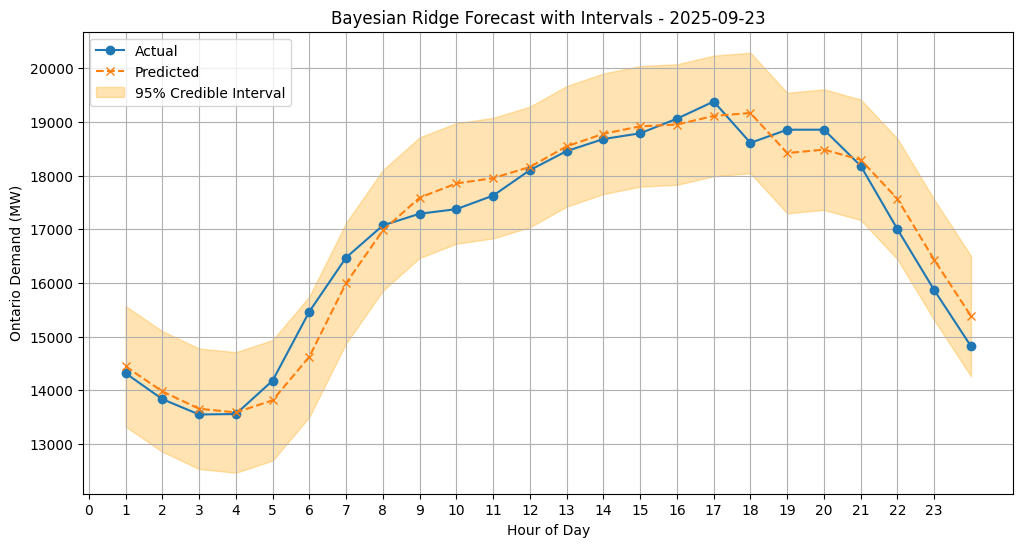

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
import datetime

# --- Preprocessing ---
data = data.dropna(subset=['Date', 'Hour', 'Ontario Demand'])
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', infer_datetime_format=True)


data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday

# sinusoidal encoding for Hour
data['Hour_sin'] = np.sin(2 * np.pi * data['Hour'] / 24)
data['Hour_cos'] = np.cos(2 * np.pi * data['Hour'] / 24)

# lag features
data['Lag1'] = data['Ontario Demand'].shift(1)
data['Lag24'] = data['Ontario Demand'].shift(24)
data = data.dropna()

#feature selection
features = ['Hour_sin', 'Hour_cos', 'Month', 'Weekday', 'Year', 'Lag1', 'Lag24']
X = data[features]
y = data['Ontario Demand']

# keep timestamps
timestamps = data['Date']
hours = data['Hour']

# --- train/test split (last 7 days as test set) ---
test_size = 24 * 7
X_train, X_test = X.iloc[:-test_size], X.iloc[-test_size:]
y_train, y_test = y.iloc[:-test_size], y.iloc[-test_size:]
ts_test = timestamps.iloc[-test_size:]
hours_test = hours.iloc[-test_size:]

# --- train Bayesian Ridge model ---
model = BayesianRidge()
model.fit(X_train, y_train)

# --- predictions with uncertainty ---
y_pred, y_std = model.predict(X_test, return_std=True)

results = pd.DataFrame({
    'Timestamp': np.array(ts_test),
    'Hour': np.array(hours_test),
    'Date': np.array(ts_test.dt.date),
    'Actual': np.array(y_test),
    'Predicted': y_pred,
    'StdDev': y_std
})

# add intervals
results['Lower'] = results['Predicted'] - 1.96 * results['StdDev']
results['Upper'] = results['Predicted'] + 1.96 * results['StdDev']
results['Lower'] = results['Predicted'] - 1.96 * results['StdDev']
results['Upper'] = results['Predicted'] + 1.96 * results['StdDev']

# RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Bayesian Ridge RMSE: {rmse:,.2f}")

# a specific day to plot 
chosen_day = datetime.date(2025, 9, 23)
day_results = results[results['Date'] == chosen_day]

if day_results.empty:
    print(f"No data for {chosen_day}")
else:
    plt.figure(figsize=(12,6))
    plt.plot(day_results['Hour'], day_results['Actual'], '-o', label='Actual')
    plt.plot(day_results['Hour'], day_results['Predicted'], '--x', label='Predicted')
    plt.fill_between(
        day_results['Hour'],
        day_results['Lower'],
        day_results['Upper'],
        color='orange',
        alpha=0.3,
        label='95% Credible Interval'
    )
    plt.xticks(range(0,24))
    plt.xlabel("Hour of Day")
    plt.ylabel("Ontario Demand (MW)")
    plt.title(f"Bayesian Ridge Forecast with Intervals - {chosen_day}")
    plt.legend()
    plt.grid(True)
    plt.show()
